# Use ChatGPT to determine the plane type

In [1]:
import os
import requests
import pandas as pd
import re

In [2]:
df = pd.read_csv("/Users/karinashedrofsky/LEDE_2023/flights-project/csvs/all_plane_info.csv")

### Make list of all unique plane make/models from flight data


In [7]:
unique_planes = []

unique_planes.extend(df['plane'].unique().tolist())

In [8]:
len(unique_planes)

224

### Ask ChatGPT

Take each plane make/model from the data and ask ChatGPT whether it's typically used as a private, commercial, military or helicopter. 

In [47]:
from dotenv import load_dotenv 
load_dotenv()

API_KEY = os.getenv("PROJECT_API_KEY")

In [48]:
from langchain.chat_models import ChatOpenAI
llm = ChatOpenAI(openai_api_key=API_KEY, model_name="gpt-3.5-turbo")

In [51]:
template = """
Categorize the following airplane model as typically being used as either a
private plane, commercial plane, military plane or helicopter. 
Respond with only the plane type: PRIVATE, COMMERCIAL, MILITARY, HELICOPTER. 
Then print the maximum number of passengers the plane model can hold, 
separated from the plane type with a comma. Don't print anything else after the number of passengers.
If you're unable to determine the type of plane, simply print UNKNOWN

Airplane model: Boeing 737
Response: COMMERCIAL, 132

Airplane model: {plane_model}
Response:"""

results = []  

for plane in unique_planes:
    prompt = template.format(plane_model=plane)
    response = llm.predict(prompt)
    results.append([plane, response])

# Create a DataFrame from the 'results' list
plane_type_df = pd.DataFrame(results, columns=['Plane', 'Info'])

#### Save the ChatGPT results to a csv 

This is to avoid having to run it through again

In [54]:
plane_type_df.to_csv("/Users/karinashedrofsky/LEDE_2023/flights-project/csvs/gpt_results.csv", index=False)

In [10]:
len(plane_type_df)

224

### Clean up the resulting DataFrame

In [11]:
#Split up the ChatGPT answers into two columns
plane_type_df[['type', 'max_passengers']] = plane_type_df['Info'].str.split(',', expand=True)


plane_type_df.drop(columns=['Info'], inplace=True)

In [13]:
plane_type_df

,Plane,type,max_passengers
0,Boeing 737-8LJ,COMMERCIAL,132
1,Boeing 737-958ER,COMMERCIAL,189
2,Airbus A321-251NX,COMMERCIAL,240
3,Boeing 767-3Y0ER,COMMERCIAL,375
4,Airbus A320-214,COMMERCIAL,150
...,...,...,...
219,Boeing 737-8S3,COMMERCIAL,189
220,Boeing 757-28A,COMMERCIAL,239
221,Gulfstream Aerospace G-IV-SP,PRIVATE,19
222,Airbus A330-223,COMMERCIAL,440


In [15]:
#Save it as csv
plane_type_df.to_csv("/Users/karinashedrofsky/LEDE_2023/flights-project/csvs/plane_type.csv", index=False)

### Break down how many of each plane category are in the data

In [16]:
plane_type_counts = plane_type_df.groupby('type').size().reset_index(name='count')
plane_type_counts

,type,count
0,COMMERCIAL,146
1,HELICOPTER,8
2,MILITARY,13
3,PRIVATE,52
4,UNKNOWN,5


#### Visualize it as a bar chart

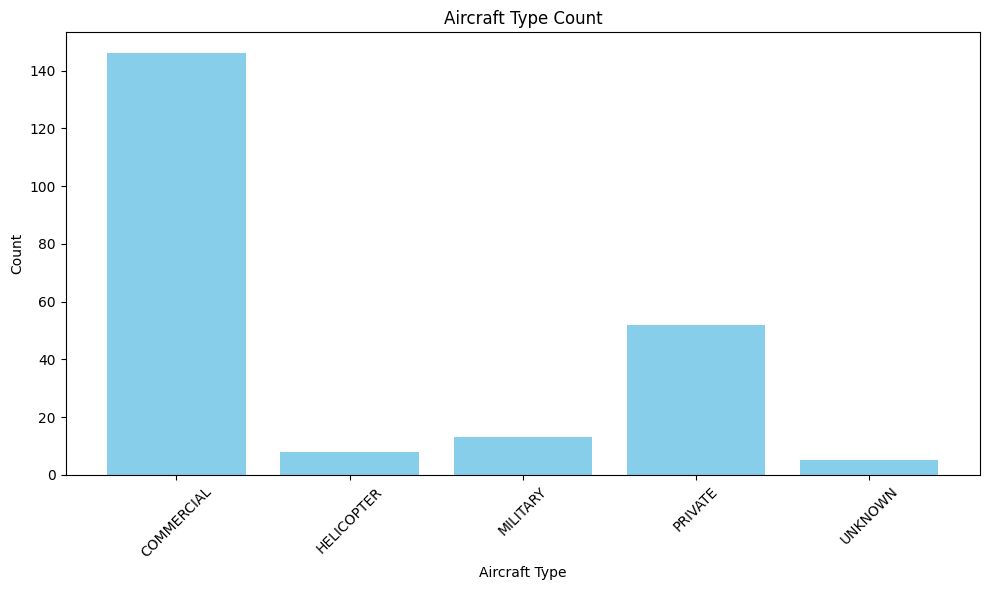

In [60]:
plt.figure(figsize=(10, 6))  # Set the size of the plot
plt.bar(plane_type_counts['type'], plane_type_counts['count'], color='skyblue')
plt.xlabel('Aircraft Type')
plt.ylabel('Count')
plt.title('Aircraft Type Count')
plt.xticks(rotation=45)
plt.tight_layout()